In [2]:
!pip install matplotlib_map_utils
!pip install numpy==1.25.0. 
!pip install geopandas
!pip install pandas
!pip install scikit-learn

  Using cached numpy-1.25.0.tar.gz (10.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^

In [3]:
#Import libraries
import os #Operating System interactions
import pandas as pd #Panel Data - for working with tabular data
import geopandas as gp # for GIS analysis or Geo Processing
from shapely.geometry import Point #Allows you to vreate gpkg files from xy data
import numpy as np #Numerical Calc
from matplotlib import pyplot as plt 
import matplotlib_map_utils as mapu #Alias of Map Utils like 'plt' for plot. For North Arrow.

In [4]:
#Set the directories
path = 'C:/Users/Sushant/OneDrive - Lamar University/1st semester/GIS/Project/Mini Project 1/Trial 2'
os.chdir(path) #Change the directory to that path

In [5]:
fname1 = 'Texas_County_Boundaries_Detailed_-8171692547258718760.gpkg'
texas = gp.read_file(fname1)

In [6]:
crs = texas.crs
print("CRS:", crs)

CRS: EPSG:3857


In [7]:
# Reproject the data to WGS84 (EPSG:4326)
texas_wgs84 = texas.to_crs(epsg=4326)

In [8]:
crs = texas_wgs84.crs
print("CRS:", crs)

CRS: EPSG:4326


In [9]:
texas_wgs84.head()

,GID,CMPTRL_NBR,CNTY_NM,DIST_NM,DPS_NBR,CNTY_FIPS,CNTY_NBR,DIST_NBR,MSA1990,MSA2000,MSA2010,GlobalID,geometry
0,29,7,Atascosa,San Antonio,7,48013,7,15,Y,Y,Y,{5024B0A9-D5E0-4E6A-9655-10EA956E9CDF},"MULTIPOLYGON (((-98.25038 28.67505, -98.24387 ..."
1,30,158,Matagorda,Yoakum,161,48321,158,13,N,N,N,{561E01F6-DDE9-4BAD-89A3-C7F809943987},"MULTIPOLYGON (((-95.84101 29.17299, -95.8411 2..."
2,31,120,Jackson,Yoakum,120,48239,121,13,N,Y,Y,{BE92BEA2-4DB2-451F-B104-947B967D9853},"MULTIPOLYGON (((-96.36618 29.01247, -96.36787 ..."
3,32,62,De Witt,Yoakum,62,48123,62,13,N,N,N,{08CDBCF3-2214-4849-A1EF-97538C8CCFA7},"MULTIPOLYGON (((-97.24011 29.38455, -97.24587 ..."
4,33,247,Wilson,San Antonio,247,48493,247,15,Y,Y,Y,{FCA032FD-BBCC-4A83-A205-489A5DA70038},"MULTIPOLYGON (((-98.13515 29.43866, -98.13517 ..."


In [10]:
type(texas_wgs84)

geopandas.geodataframe.GeoDataFrame

In [11]:
print(texas_wgs84.crs)

EPSG:4326


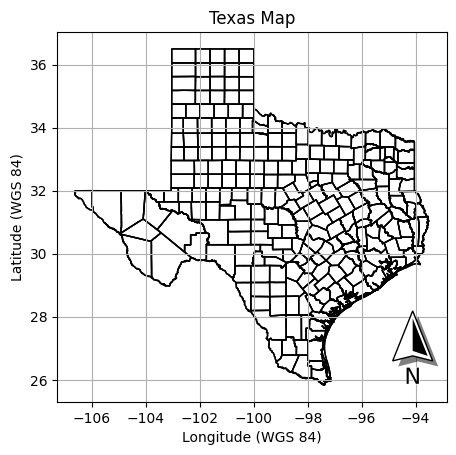

In [12]:
#Visualize the overlay result (you can customise this based on your needs)
fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
plt.grid()
plt.title ('Texas Map')
plt.show()

In [13]:
df_2022 = pd.read_csv('Bridge_2022.csv')
df_2023 = pd.read_csv('Bridge_2023.csv')

C:\Users\Sushant\AppData\Local\ipykernel_2916\736563296.py:1: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('Bridge_2022.csv')
C:\Users\Sushant\AppData\Local\ipykernel_2916\736563296.py:2: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('Bridge_2023.csv')


In [14]:
# Function to convert the 8-9 digit lat/lon to decimal degrees (DD)
def dms_to_dd(value):
    # Convert the value to a string to extract parts, and ensure it's positive for parsing
    value_str = str(abs(int(value)))  # Ensure the value is treated as an integer and absolute

    # Extract the seconds (last 4 digits), minutes (2 digits before that), and degrees (rest of the digits)
    seconds = int(value_str[-4:]) / 100  # Seconds are the last four digits, divided by 100
    minutes = int(value_str[-6:-4])      # Minutes are the two digits before the seconds
    degrees = int(value_str[:-6])        # Degrees are everything before the minutes

    # Convert DMS to Decimal Degrees (DD)
    dd = degrees + minutes / 60 + seconds / 3600

    # Return the result as a negative if the original value was negative
    return -dd if value < 0 else dd


In [15]:
# Remove rows with NaN values in the latitude and longitude columns
df_2022 = df_2022.dropna(subset=['LAT_016', 'LONG_017'])
df_2023 = df_2023.dropna(subset=['LAT_016', 'LONG_017'])

# Apply the conversion function to the latitude and longitude columns for 2022
df_2022['LAT_016'] = df_2022['LAT_016'].apply(dms_to_dd)
df_2022['LONG_017'] = df_2022['LONG_017'].apply(lambda x: -dms_to_dd(x))  # Longitude is negative for the western hemisphere

# Convert latitude and longitude columns to numeric, coerce errors to NaN
df_2022['LAT_016'] = pd.to_numeric(df_2022['LAT_016'], errors='coerce')
df_2022['LONG_017'] = pd.to_numeric(df_2022['LONG_017'], errors='coerce')

# Apply the conversion function to the latitude and longitude columns for 2023
df_2023['LAT_016'] = df_2023['LAT_016'].apply(dms_to_dd)
df_2023['LONG_017'] = df_2023['LONG_017'].apply(lambda x: -dms_to_dd(x))  # Longitude is negative for the western hemisphere

# Convert latitude and longitude columns to numeric, coerce errors to NaN
df_2023['LAT_016'] = pd.to_numeric(df_2023['LAT_016'], errors='coerce')
df_2023['LONG_017'] = pd.to_numeric(df_2023['LONG_017'], errors='coerce')

# Print or save the updated DataFrame
print(df_2022[['LAT_016', 'LONG_017']])
print(df_2023[['LAT_016', 'LONG_017']])

         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
42334  32.771111  -96.811650
42335  32.771917  -96.810233
42336  32.770811  -96.807433
42337  32.777161  -96.810997
42338  32.759139  -96.976119

[42339 rows x 2 columns]
         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
38132  27.783853  -97.619453
38133  27.799836  -97.619381
38134  27.904692  -97.880942
38135  27.887408  -97.850358
38136  27.875600  -97.829600

[38137 rows x 2 columns]


In [16]:
# Print or save the updated DataFrame 2022
print(df_2022[['LAT_016', 'LONG_017']])
type(df_2023)

         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
42334  32.771111  -96.811650
42335  32.771917  -96.810233
42336  32.770811  -96.807433
42337  32.777161  -96.810997
42338  32.759139  -96.976119

[42339 rows x 2 columns]


pandas.core.frame.DataFrame

In [17]:
# Print or save the updated DataFrame 2023
print(df_2023[['LAT_016', 'LONG_017',]])
type(df_2023)

         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
38132  27.783853  -97.619453
38133  27.799836  -97.619381
38134  27.904692  -97.880942
38135  27.887408  -97.850358
38136  27.875600  -97.829600

[38137 rows x 2 columns]


pandas.core.frame.DataFrame

In [18]:
structure_2022 = df_2022['STRUCTURE_NUMBER_008']
structure_2023 = df_2023['STRUCTURE_NUMBER_008']

In [19]:
type(structure_2022)

pandas.core.series.Series

In [20]:
new_bridges_2023 = structure_2023[~structure_2023.isin(structure_2022)]

In [21]:
print(new_bridges_2023)

9        000021594-62610
115      010600AA2130001
584      010920004702684
585      010920004702685
586      010920004702686
              ...       
37942    161780010216219
37943    161780010216221
37944    161780010216223
37945    161780010216225
37946    161780010216227
Name: STRUCTURE_NUMBER_008, Length: 777, dtype: object


In [22]:
new_bridges_df = df_2023[df_2023['STRUCTURE_NUMBER_008'].isin(new_bridges_2023)]

In [23]:
type(new_bridges_df)

pandas.core.frame.DataFrame

In [24]:
print(new_bridges_df)

       STATE_CODE_001 STRUCTURE_NUMBER_008  RECORD_TYPE_005A  \
9                  48      000021594-62610                 1   
115                48      010600AA2130001                 1   
584                48      010920004702684                 1   
585                48      010920004702685                 1   
586                48      010920004702686                 1   
...               ...                  ...               ...   
37942              48      161780010216219                 1   
37943              48      161780010216221                 1   
37944              48      161780010216223                 1   
37945              48      161780010216225                 1   
37946              48      161780010216227                 1   

       ROUTE_PREFIX_005B  SERVICE_LEVEL_005C  ROUTE_NUMBER_005D  \
9                      6                   0                0.0   
115                    4                   1             2130.0   
584                    2      

In [25]:
new_bridges_df.to_csv('new_bridges_2023.csv', index=False)

In [26]:
type(new_bridges_df)

pandas.core.frame.DataFrame

In [27]:
latitude = new_bridges_df['LAT_016']
longitude = new_bridges_df['LONG_017']

In [28]:
print(latitude)
print(longitude)

9        32.680500
115      33.371656
584      33.628550
585      33.628522
586      33.637911
           ...    
37942    27.690872
37943    27.680267
37944    27.672511
37945    27.659728
37946    27.655214
Name: LAT_016, Length: 777, dtype: float64
9       -94.145833
115     -95.774397
584     -96.613514
585     -96.613681
586     -96.616428
           ...    
37942   -97.734608
37943   -97.738428
37944   -97.741194
37945   -97.750092
37946   -97.757883
Name: LONG_017, Length: 777, dtype: float64


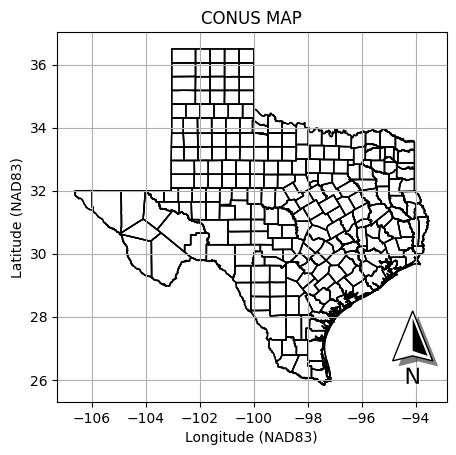

In [29]:
#Visualize the overlay resultx

fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (NAD83)')
ax1.set_ylabel('Latitude (NAD83)')
plt.grid()
plt.title('CONUS MAP')
plt.show()

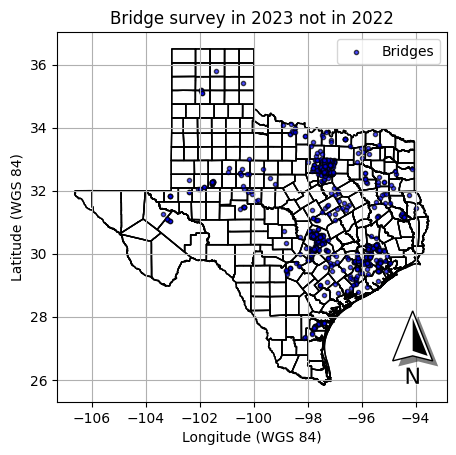

In [31]:
#Visualize the overlay resultx

fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
plt.scatter(longitude, latitude, c='blue', marker='.', edgecolor='k', alpha=0.7, label='Bridge Locations')
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
plt.grid()
plt.legend(['Bridges'], loc='upper right')
plt.savefig('bridge_2023_notin_2022', dpi=300, bbox_inches='tight')
plt.title('Bridge survey in 2023 not in 2022')
plt.show()